In [ ]:
# SETUP CELL make sure to run this first.
!pip install -qq numpy==1.25.2
!pip install -qq opencv-python==4.8.0.76
!pip install -qq scikit-image==0.22.0
!pip install -qq Pillow==10.0.0
!pip install -qq matplotlib==3.7.3

!wget https://github.com/jc639/comp_vis_workshop/blob/main/cat.jpg?raw=true -O cat.jpg

# Computer Vision Workshop 1

Welcome everyone! In this workshop, we will learn the basics of getting into computer vision as a subject area within Artificial Intelligence. The workshop assumes that you already have python knowldge and have worked with some data science libraries such as NumPy and Matplot. It is a bonus if you also have worked with machine learning models. Without further ado, lets start by importing some libraries that we are always most certainly going to need.

## 1.1 Understanding Images

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import time

CV2 is the OpenCV library which is widely popular in computer vision methods and has several classical computer vision methods built in. Lets start by importing an image. We will use the .imread function to read an image file from its path and load it as an image object.

In [6]:
image = cv2.imread('./cat.jpg')

Now, lets use the .imshow function of Matplot library to display the image.

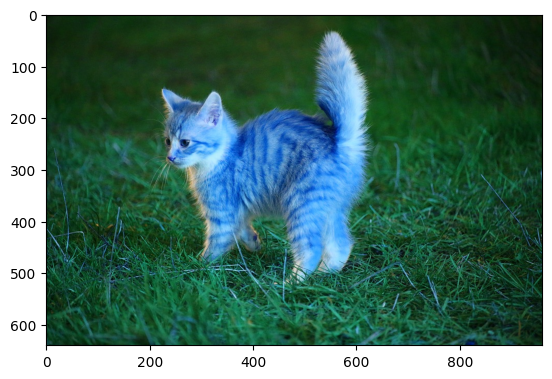

In [7]:
plt.imshow(image)

Our cat seems to have turned blue for some reason. Lets explore a little more to understand why this is the case. Using a new code cell, please type in the below code which loads the cat image using OpenCV but displays it using OpenCV's own display image function called imshow (actually this is a patched version that works in colab).

```python
image = cv2.imread('./cat.jpg')

cv2_imshow('output_window', image)
```

In [ ]:
# type code in here
# run it after adding each line to get an idea of what it is doing

And there you go, our cat is back to being cute again. Lets examine why Matplot library makes it blue.

To understand images properly, we must understand what the image object is comprised of. Lets explore its properties using NumPy.

In [8]:
print(type(image))

<class 'numpy.ndarray'>


Oh well, it just a NumPy array. Thats handy though, now we can see its shape.

In [9]:
print(image.shape)

(640, 960, 3)


So, the cat image seems to be of shape (640, 960, 3). This is 3 dimensional array of 640 rows, 960 columns and 3 depth layers. In image terminology, the rows refer to the height of the image and the columns refer to the width of the image. Hence, the cat image is comprised of 640 pixels in height and 960 pixels in width.

Now, as for the 3rd dimension, it refers to the colour channel of the image. Within computer science, any displayed pixel is always comprised of 3 distinct colour values within it, namely Red, Green and Blue. The values for these colours range between 0 and 255. Any known colour to our eye can be formulated using a combination of these three distinct colours. Its similar to how different colour palettes seen within a watercolour art is comprised by mixing different colours. You may also have come across the 3 pixel colours if you ever looked very closely onto an LCD screen as they are comprised of small dots with red, green and blue lights. The light emitted from these 3 different lights is what causes the image to appear on screen. Moving forward from here, we will refer to the three dinction colour layers as 'channels'.

In below three cells, we print the three colour channels separately for a small section within the cat's body.

In [10]:
print(image[300:310,400:410,0])

[[16 22 41 55 64 65 74 84 82 81]
 [21 17 26 37 50 53 60 65 72 71]
 [19 18 27 34 53 62 67 61 62 62]
 [ 3  0 13 27 50 55 64 68 63 78]
 [12  2  1 26 66 54 76 67 72 58]
 [14  7 13 18 48 58 79 74 63 87]
 [14  1 14 20 36 50 62 73 79 81]
 [ 0  2 14 11 23 51 61 62 71 63]
 [ 0  1  7 10 23 53 73 67 77 62]
 [ 0  0  0 16 26 44 70 68 77 80]]


In [11]:
print(image[300:310,400:410,1])

[[ 99 107 124 137 143 143 149 157 157 156]
 [103 101 108 119 128 130 135 138 147 146]
 [101 101 108 114 131 138 142 136 137 137]
 [ 86  82  94 107 127 130 138 140 136 153]
 [ 95  83  80 103 139 126 148 138 143 129]
 [ 97  90  91  95 123 132 151 145 134 160]
 [ 96  83  92  97 113 125 137 147 152 154]
 [ 84  86  96  91 100 127 136 138 146 139]
 [ 84  89  91  92 100 130 147 142 152 136]
 [ 88  85  84 100 107 122 146 144 152 153]]


In [12]:
print(image[300:310,400:410,2])

[[208 209 215 218 216 210 217 225 226 225]
 [214 207 203 201 204 199 204 206 216 215]
 [212 210 205 201 208 210 211 205 206 206]
 [195 191 193 196 206 204 210 210 204 221]
 [200 188 177 195 223 204 220 206 210 196]
 [202 195 192 188 209 210 223 212 198 222]
 [207 195 198 194 200 203 206 211 212 214]
 [196 198 203 192 192 209 210 204 208 198]
 [192 197 197 193 196 217 229 216 221 202]
 [196 195 190 202 204 212 229 220 221 221]]


Similarly, using the below code, we display how the individual channels for the whole image would look like if we were to replace all other channel values with zero.

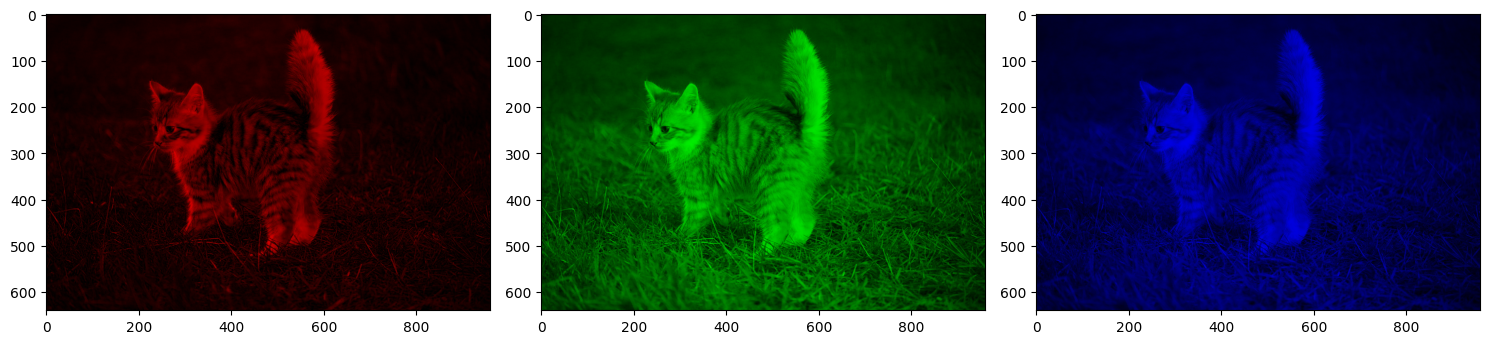

In [13]:
fig, axes = plt.subplots(1,3, figsize=(15,15))
zeros = np.zeros((640,960), dtype=np.uint8)

axes[0].imshow(cv2.merge([image[:,:,0], zeros, zeros]))
axes[1].imshow(cv2.merge([zeros, image[:,:,1], zeros]))
axes[2].imshow(cv2.merge([zeros, zeros, image[:,:,1]]))

plt.tight_layout()

Now, lets do the same within a new code cell. Please type in the below code which will reproduce a similar result using OpenCV's display function.

```python
image = cv2.imread('./cat.jpg')

zeros = np.zeros((640,960), dtype=np.uint8)

red = cv2.merge([image[:,:,0], zeros, zeros])
green = cv2.merge([zeros, image[:,:,1], zeros])
blue = cv2.merge([zeros, zeros, image[:,:,1]])

cv2_imshow('red_window', red)
time.sleep(0.5)

cv2_imshow('green_window', green)
time.sleep(0.5)

cv2_imshow('blue_window', blue)
time.sleep(0.5)
```

In [ ]:
# type code in here
# run it after adding each line to get an idea of what it is doing

Awesome, isn't it? But wait, did you notice something strange? Why is the red_window showing the blue image and the blue_window showing the red?

Well, this is where the distinction between how the two libraries OpenCV and Matplot process images factor in. When Matplot reads NumPy arrays that are images, it considers the channels sequentially as R, G and B respectively. However, OpenCV considers the channels to be in sequence B, G and R respectively.

We must always use this knowledge when we read an image via OpenCV and display it using Matplot. Now lets ask Matplot to display the cat image by providing it the channel sequence that it understands as correct.

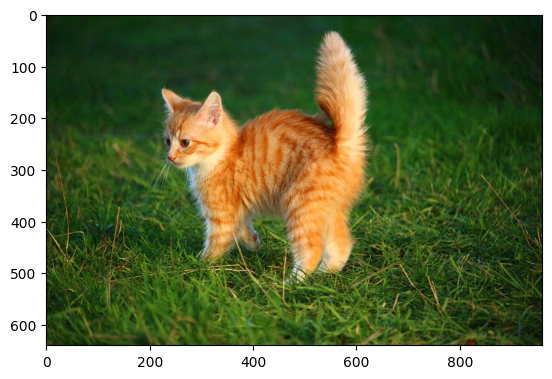

In [14]:
plt.imshow(image[...,::-1])

And voila! Cat can be cute in Matplot also.

## Avoid this gotcha!

The fact that different computer vision libraries order the Red-Green-Blue channels in different ways its good to be aware of how some of the basic libraries do it and ways to keep it consistent, especially if you use a mix of methods and functions from the different libraries! 

### OpenCV

With opencv **by default opens images with BGR order** but we can actually use the method `.cvtColor` that will make sure the image array has the RGB order. This is how to do that:

(640, 960, 3)


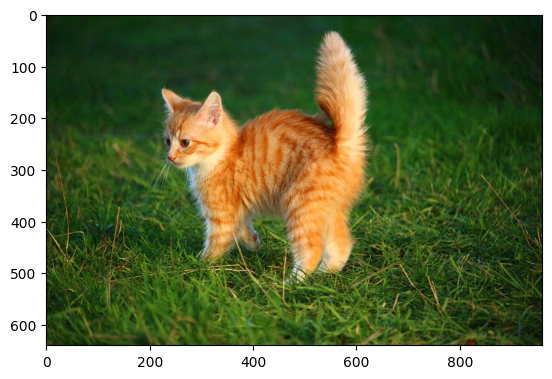

In [15]:
image = cv2.imread('./cat.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(image.shape)
plt.imshow(image)

### Pillow

Another library commonly used in computer vision for opening and manipulating images in 'pillow' which is imported with the name `PIL`, pillow **by default loads the images with an RGB ordering** and pixel values can be accessed through a numpy array, it can be used like so:

(640, 960, 3)


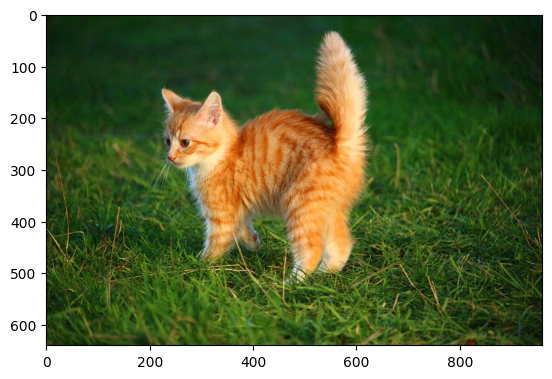

In [16]:
from PIL import Image

image = Image.open('./cat.jpg')

# to get a numpy arr
arr  = np.array(image)
print(arr.shape)

plt.imshow(image)

### scikit-image

Finally, another common library you might encounter when doing computer vision is scikit-image, this library again by default loads the images in an **RGB order** and returns an array, here's how to do that with scikit-image:

(640, 960, 3)


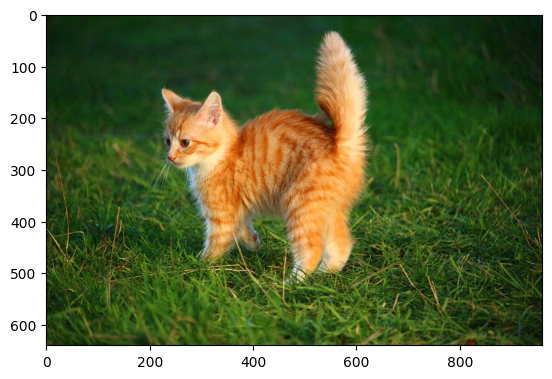

In [17]:
from skimage.io import imread

image = imread('./cat.jpg')
print(image.shape)

plt.imshow(image)